A classification is where you try to classify something as one thing or another:

A few types of classification problems:

- Binary Classification
- Multiclass Classification
- Multilabel Classification

#### Creating data to view and Fit

In [1]:
from sklearn.datasets import make_circles
import tensorflow  as tf

In [2]:
# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


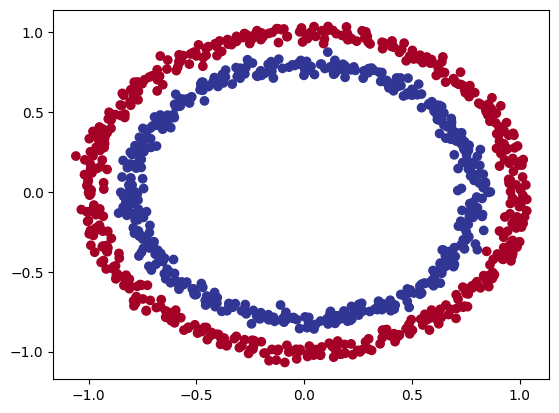

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.RdYlBu);

🔨**Playground**:
 https://playground.tensorflow.org/

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [10]:
# Let's view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#### Steps in modelling
The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 4.6431 - accuracy: 0.4650
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.0272 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 3.6650 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7711 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7129 - accuracy: 0.4950


In [12]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)

In [13]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy...it's preforming as if it is guessing!!

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_2.fit(X, y, epochs=100, verbose = 0)

In [15]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000


[0.696555495262146, 0.5]

#### Improving our Model
**Common ways to improve a deep model:**
1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [16]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_3.fit(X, y, epochs=100, verbose = 0)

In [17]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5040


[0.6981680393218994, 0.5040000081062317]

To visualize our model's prediction, let's create a function `plot_decision_boundary`, this function will
- Take in a trained model, features(X) and labels(y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between different zones (where each unique class falls)

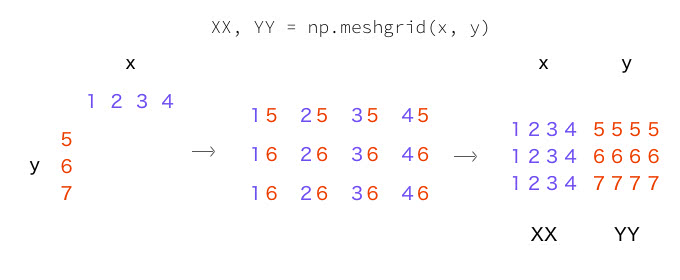

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
    '''
        Plots the decision boundary created by a model predictions on X
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Create X value (We're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions
    y_preds = model.predict(x_in)

    # Check for multi_class
    if len(y_preds[0])>1:
        print('Doing Multiclass Classification\n')
        # We have to reshape our predictions to get them ready for plotting
        y_preds = np.argmax(y_preds, axis = 1).reshape(xx.shape)

    else:
        print("Doing Binary classification\n")
        y_preds = np.round(y_preds).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_preds, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing Binary classification



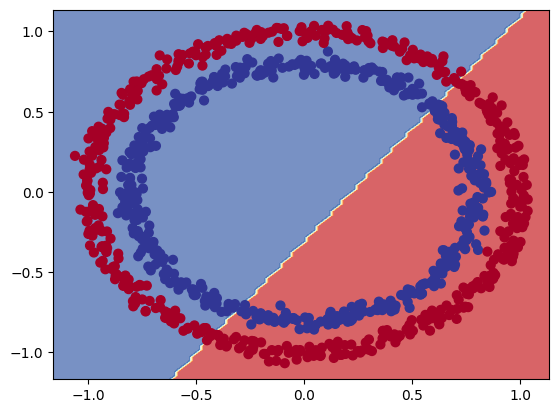

In [20]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3, X = X, y = y)

In [21]:
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [22]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

In [23]:
xx

array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       ...,
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]])

In [24]:
yy

array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
        -1.16776832, -1.16776832],
       [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
        -1.14449789, -1.14449789],
       [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
        -1.12122747, -1.12122747],
       ...,
       [ 1.08946283,  1.08946283,  1.08946283, ...,  1.08946283,
         1.08946283,  1.08946283],
       [ 1.11273325,  1.11273325,  1.11273325, ...,  1.11273325,
         1.11273325,  1.11273325],
       [ 1.13600368,  1.13600368,  1.13600368, ...,  1.13600368,
         1.13600368,  1.13600368]])

⭐ **Resource** :
https://cs231n.github.io/neural-networks-case-study/

In [25]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data

In [26]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit our model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose = 0)

2/2 [==============================] - 0s 6ms/step


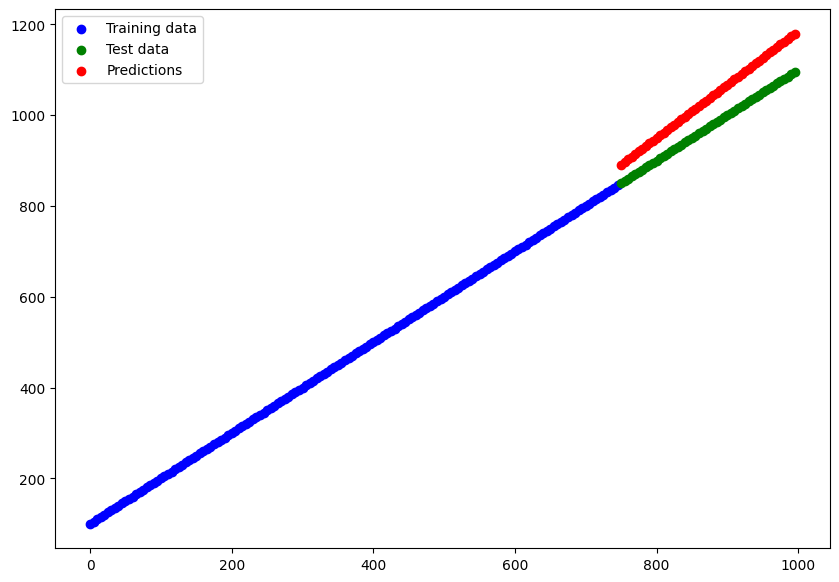

In [27]:
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test data")
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = 'Predictions')
plt.legend();

#### The missing piece : Non-Linearity

In [28]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5572 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5412 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5344 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5231 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4701 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4190 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4048 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4015 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3523 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2219 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing Binary classification



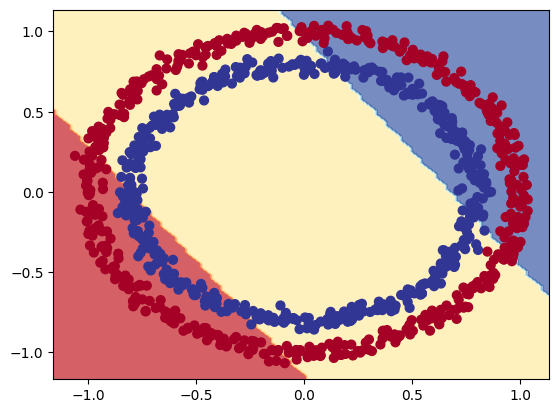

In [29]:
plot_decision_boundary(model = model_4,
                       X = X,
                       y = y)

In [30]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu")
])

# 2. Compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_5.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.8869 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.3800
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.3170
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7691 - accuracy: 0.3200
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7642 - accuracy: 0.3080
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.3090
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.2710
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.2740
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.2580
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7416 - accuracy: 0.3070
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing Binary classification



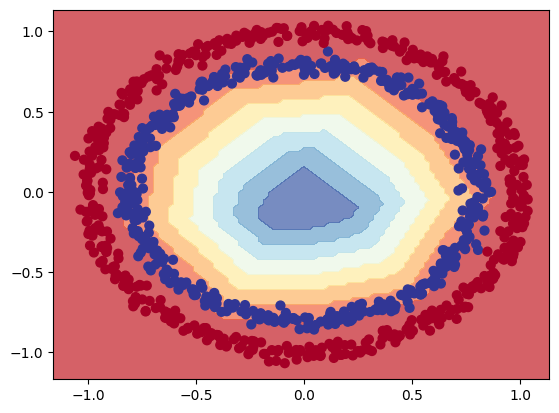

In [31]:
plot_decision_boundary(model = model_5,
                       X = X,
                       y = y)

In [32]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# 3. Fit our model
model_6.fit(X, y, epochs=250, verbose = 0)

313/313 [==============================] - 0s 1ms/step
Doing Binary classification



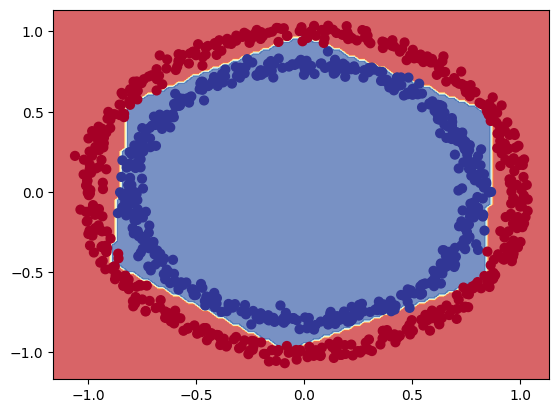

In [33]:
plot_decision_boundary(model = model_6,
                       X = X,
                       y = y)

In [34]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9850


[0.15175463259220123, 0.9850000143051147]

🔑 **Note:** The combination of **linear** and **non-linear** functions are one of the key fundamentals of neural networks.

#### Evaluating and Improving our Classification Model

In [35]:
len(X)

1000

In [36]:
# Split into train, test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [37]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_7.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

# 3. Fit our model
history = model_7.fit(X_train, y_train, epochs=25, verbose = 0)

In [38]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9950


[0.07343737781047821, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
Doing Binary classification

313/313 [==============================] - 0s 1ms/step
Doing Binary classification



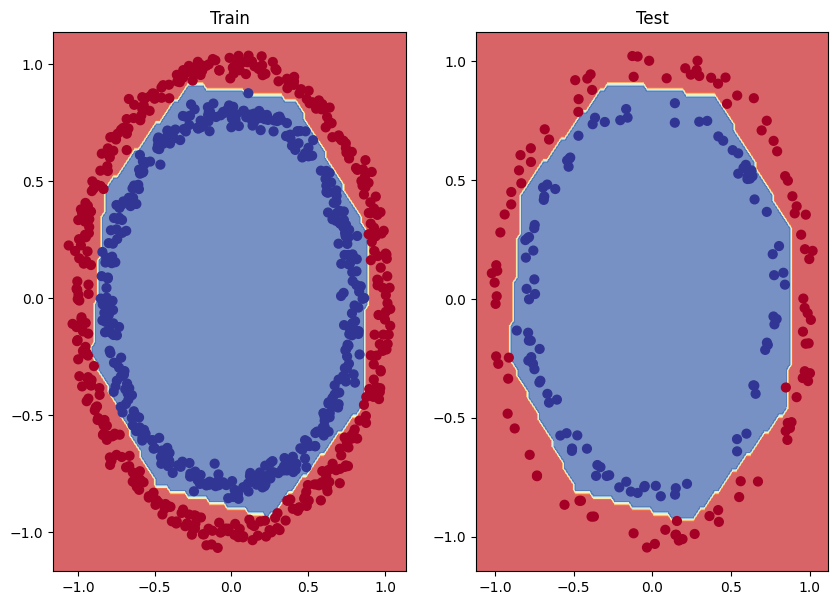

In [39]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)

#### Plot the loss (or training) curves

In [40]:
history.history

{'loss': [0.6868838667869568,
  0.6807719469070435,
  0.6724202036857605,
  0.6603639721870422,
  0.6436029076576233,
  0.6127247214317322,
  0.5748944282531738,
  0.5379344820976257,
  0.48522788286209106,
  0.4325449764728546,
  0.3759280741214752,
  0.32255470752716064,
  0.2657104432582855,
  0.2249082773923874,
  0.19429174065589905,
  0.16971750557422638,
  0.14897280931472778,
  0.13575085997581482,
  0.12222515791654587,
  0.11248359829187393,
  0.09993710368871689,
  0.0928853452205658,
  0.0836925134062767,
  0.07994908094406128,
  0.0749509334564209],
 'accuracy': [0.5224999785423279,
  0.5975000262260437,
  0.574999988079071,
  0.5899999737739563,
  0.6537500023841858,
  0.6499999761581421,
  0.8050000071525574,
  0.793749988079071,
  0.862500011920929,
  0.9049999713897705,
  0.9512500166893005,
  0.9674999713897705,
  0.9887499809265137,
  0.9900000095367432,
  0.9900000095367432,
  0.9937499761581421,
  0.9950000047683716,
  0.9962499737739563,
  0.9962499737739563,
  0.

In [41]:
# Convert the history object to a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.686884,0.52250
1,0.680772,0.59750
2,0.672420,0.57500
3,0.660364,0.59000
4,0.643603,0.65375
5,0.612725,0.65000
6,0.574894,0.80500
7,0.537934,0.79375
8,0.485228,0.86250
9,0.432545,0.90500


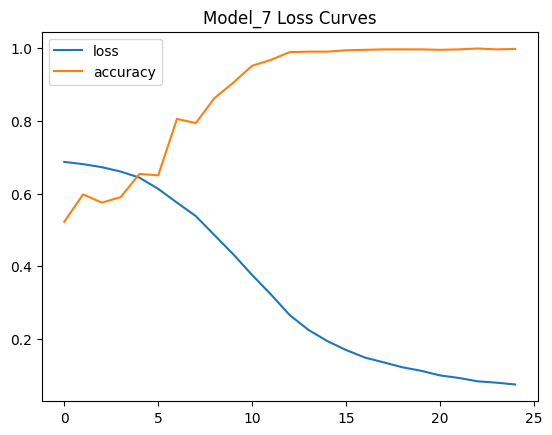

In [42]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 Loss Curves");

#### Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - Think of a callback as an extra piece of functionality, you can add to your model *while* it is training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot

In [43]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model_8.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# 3. Fit our model
history_8 = model_8.fit(X_train, y_train, epochs=100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.5150 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

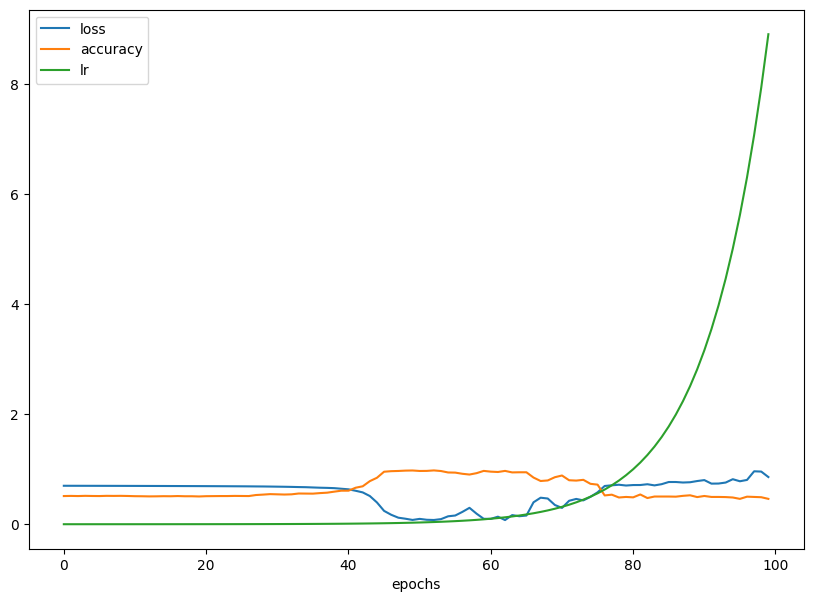

In [44]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate v/s Loss')

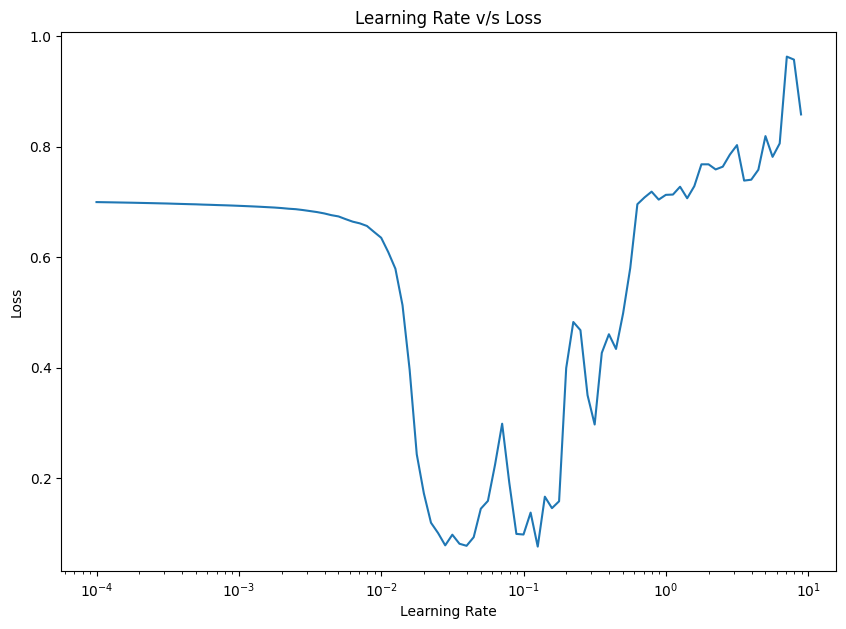

In [45]:
# plot the learning rate vs the loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_8.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate v/s Loss')

In [46]:
len(lrs)

100

In [47]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
tf.random.set_seed(42)

# 1. Create our model
model_9 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

# Compile the model
model_9.compile(
        loss = 'binary_crossentropy',
        optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-1.5),
        metrics='accuracy'
)

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5412
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.5962
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6575
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7538
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7937
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8250
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8487
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8475
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8662
Epoch 11/

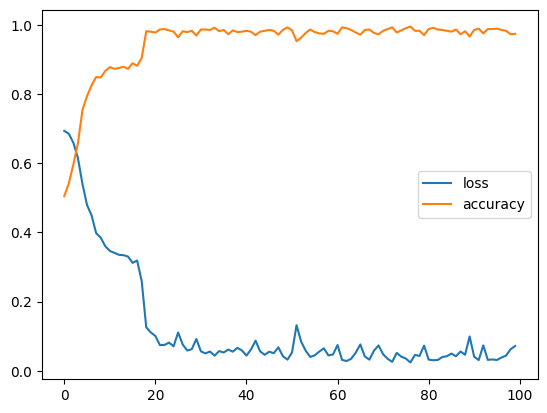

In [49]:
pd.DataFrame(history_9.history).plot();

In [50]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9650


[0.09166248142719269, 0.9649999737739563]

In [51]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9950


[0.07343737781047821, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Doing Binary classification

313/313 [==============================] - 1s 2ms/step
Doing Binary classification



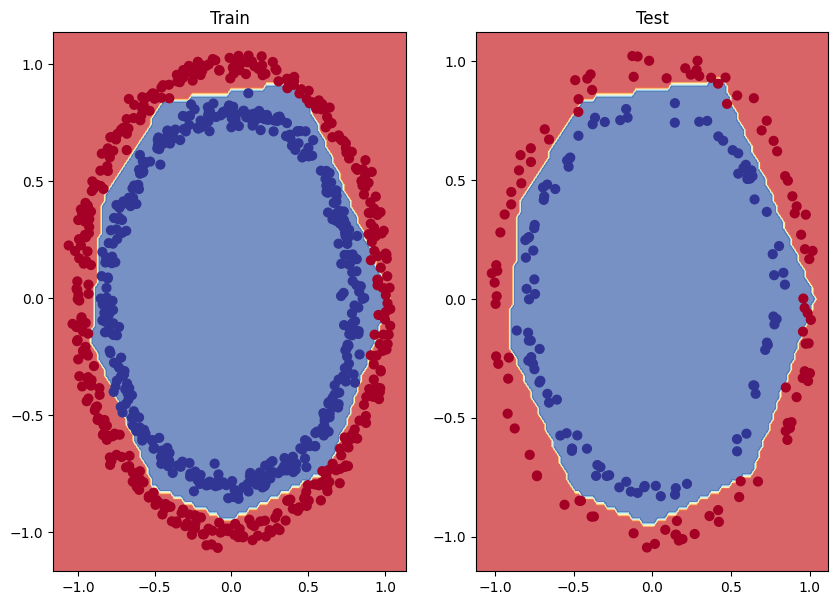

In [52]:
# Plot the decision boundary for the training and the test sets for model 9
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)

#### More evaluation methods for Classification Problem

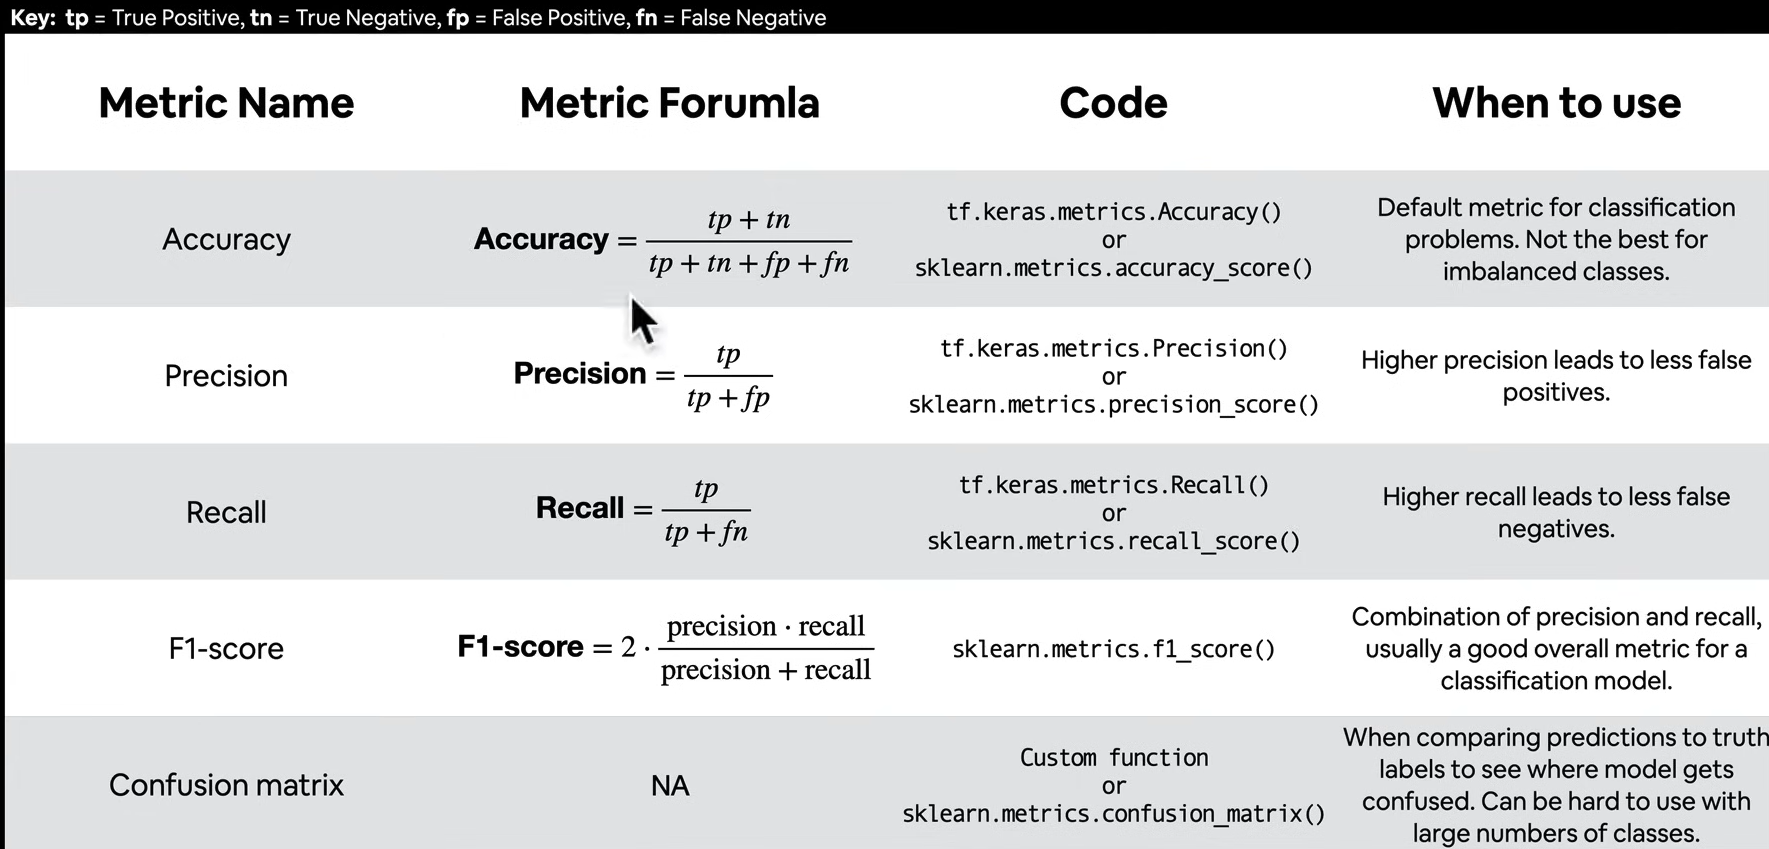

- Classification Report (scikit-learn)

In [53]:
# Check the accuracy and loss of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9650
Model loss on the test set: 0.09166248142719269
Model accuracy on the test set: 96.50%


How about confusion matrix?

In [54]:
from sklearn.metrics import confusion_matrix

y_preds = model_9.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [55]:
y_preds[:10]

array([[9.9729997e-01],
       [9.9855071e-01],
       [9.9855071e-01],
       [9.9855071e-01],
       [9.0694553e-01],
       [3.9694196e-06],
       [9.9855071e-01],
       [9.3485921e-04],
       [9.9855071e-01],
       [1.9156626e-04]], dtype=float32)

In [56]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

Looks like `y_preds` is showing probabilities instead of 0 and 1.

The standard output from the sigmoid or softmax activation functions.

In [57]:
9.9897736e-01

0.99897736

In [58]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [59]:
# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm

array([[94,  7],
       [ 0, 99]])

#### How about we prettify our confusion matrix?

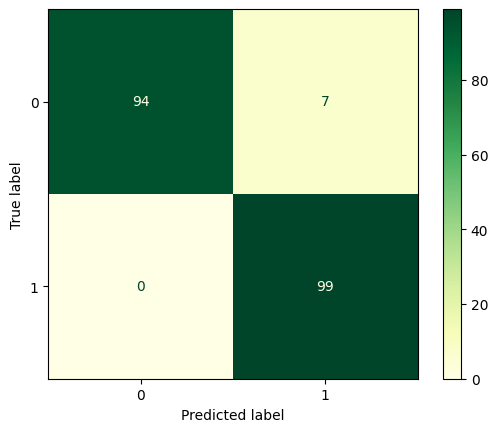

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGn');

### Working with a larger example (Multi-class Classification)

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [105]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# https://www.tensorflow.org/datasets/catalog/fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [106]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [107]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

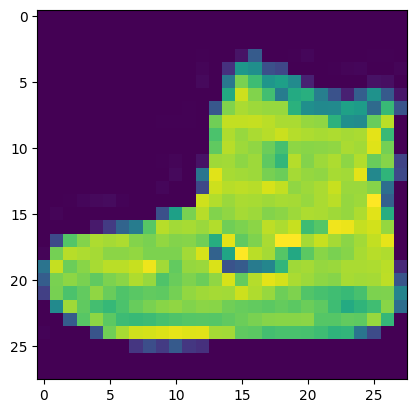

In [108]:
# Plot a single sample
plt.imshow(train_data[0]);

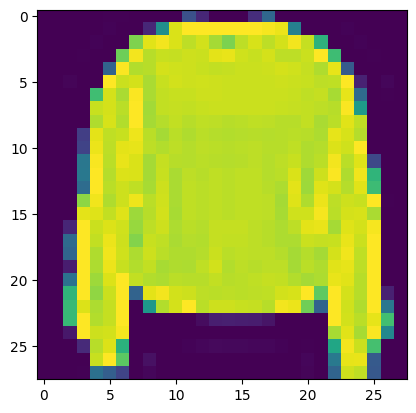

In [109]:
plt.imshow(train_data[7]);

In [110]:
# Check out sample labels
train_labels[7]

2

In [111]:
# Create a small list so we can index onto our training labels so they are human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

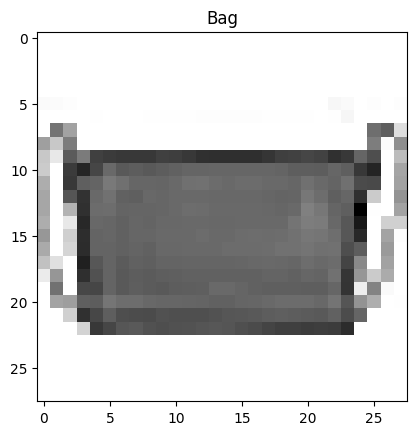

In [112]:
# Plot an example image and its label
index_of_choice = 130
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [113]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

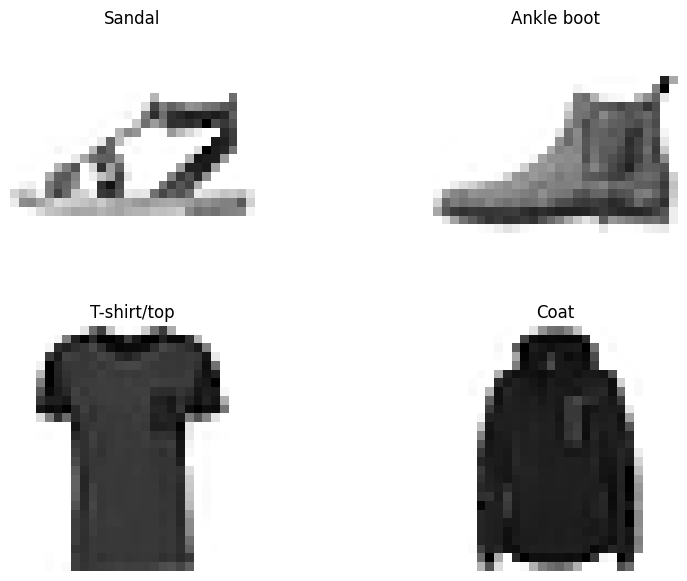

In [114]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (10,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

#### Building a multi-class classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak few certain things:
- Input Shape = 28 x 28 (the shape of one image)
- Output Shape = 10 (One per class of clothing)
- Loss function = tf.keras.losses.CategoricalCrossentropy()
    - If your labels are One_Hot encoded use `CategoricalCrossentropy`
    - If your labels are in integer form use `SparseCategoricalCrossentropy`
- Output layer activation = Softmax (not Sigmoid)

In [115]:
train_data[0].shape

(28, 28)

In [116]:
len(class_names)

10

In [117]:
flatten_model = tf.keras.Sequential(tf.keras.layers.Flatten(input_shape=(28,28)))
flatten_model.output_shape
# Our data got flatten from 28*28 to (None, 784)

(None, 784)

In [118]:
28*28

784

In [119]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [120]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)

# 2. Compile the model
model_10.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy() -> used when there are two or more label classes. It expect labels to be provided in a one_hot representation
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
non_norm_history = model_10.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3623 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

In [121]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [122]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)

# 2. Compile the model
model_10.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(), # CategoricalCrossentropy() -> used when there are two or more label classes. It expect labels to be provided in a one_hot representation
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
non_norm_history = model_10.fit(train_data, tf.one_hot(train_labels, depth = 10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4527 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2818 - accuracy: 0.1112 - val_loss: 2.2375 - val_accuracy: 0.1283
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1747 - accuracy: 0.1495 - val_loss: 1.9874 - val_accuracy: 0.2026
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7637 - accuracy: 0.2569 - val_loss: 1.7029 - val_accuracy: 0.2622
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6612 - accuracy: 0.2819 - val_loss: 1.6500 - val_accuracy: 0.2812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6301 - accuracy: 0.2862 - val_loss: 1.6298 - val_accuracy:

In [123]:
# Check the model summary
model_10.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 4)                 3140      
                                                                 
 dense_47 (Dense)            (None, 4)                 20        
                                                                 
 dense_48 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

**NOTE:**

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors that try to find patterns between 0 and 1.

In [125]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [126]:
# Check the min. and max. values of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [131]:
# Now since our data is normalised, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Re-create model_10
model_11 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
    ]
)

# Compile the model
model_11.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
norm_history = model_11.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 10,
             validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1401 - accuracy: 0.5755 - val_loss: 0.7719 - val_accuracy: 0.7385
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6798 - accuracy: 0.7626 - val_loss: 0.6622 - val_accuracy: 0.7660
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6022 - accuracy: 0.7893 - val_loss: 0.6136 - val_accuracy: 0.7894
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5707 - accuracy: 0.8004 - val_loss: 0.5844 - val_accuracy: 0.7993
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5518 - accuracy: 0.8073 - val_loss: 0.6066 - val_accuracy: 0.7861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.8115 - val_loss: 0.5890 - val_accuracy: 0.7989
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5287 - accuracy: 0.8156 - val_loss: 0.5735 - val_accuracy:

🔑 **Note** : Neural networks tend to prefer data in numerical form as well as scaled/normalised (numbers between 0 and 1)

<Axes: title={'center': 'Normalized Data'}>

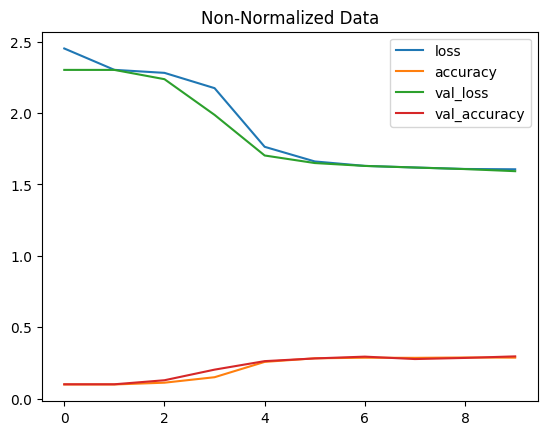

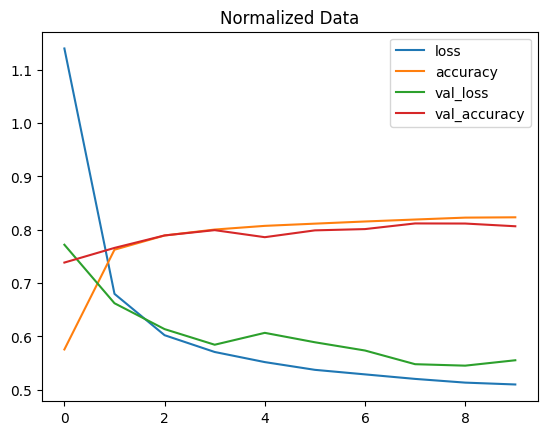

In [132]:
import pandas as pd
# Plot non-normalised data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data')
# Plot normalised data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized Data')

🔑 **Note :**
The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (eg. same architecture but different data or same data but different architecture).

#### Finding the ideal learning rate

In [134]:
# Now since our data is normalised, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
    ]
)

# Compile the model
model_12.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))

# Fit the model
find_lr_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 40,
             validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3523 - accuracy: 0.4854 - val_loss: 0.9397 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8516 - accuracy: 0.6504 - val_loss: 0.8305 - val_accuracy: 0.6479 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7502 - accuracy: 0.6977 - val_loss: 0.7323 - val_accuracy: 0.7186 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6532 - accuracy: 0.7544 - val_loss: 0.6398 - val_accuracy: 0.7665 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5910 - accuracy: 0.7872 - val_loss: 0.6025 - val_accuracy: 0.7866 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5683 - accuracy: 0.7982 - val_loss: 0.6005 - val_accuracy: 0.7908 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

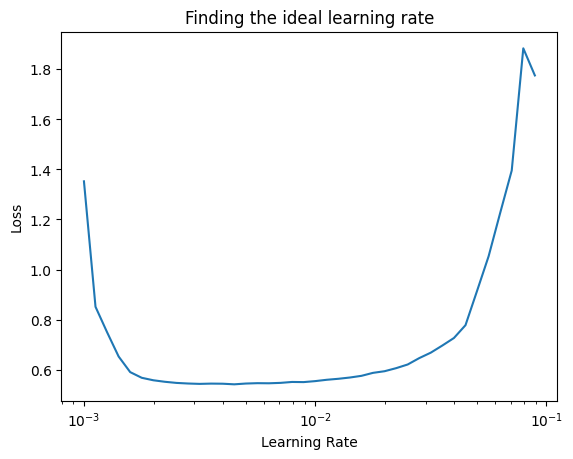

In [135]:
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [137]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
    ]
)

# Compile the model
model_13.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

# Fit the model
model_13.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 20,
             validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0346 - accuracy: 0.6101 - val_loss: 0.7605 - val_accuracy: 0.7266
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6997 - accuracy: 0.7534 - val_loss: 0.7129 - val_accuracy: 0.7500
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6462 - accuracy: 0.7755 - val_loss: 0.6540 - val_accuracy: 0.7763
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6175 - accuracy: 0.7877 - val_loss: 0.6333 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.7933 - val_loss: 0.6371 - val_accuracy: 0.7749
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5877 - accuracy: 0.7964 - val_loss: 0.6220 - val_accuracy: 0.7909
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5820 - accuracy: 0.7975 - val_loss: 0.6297 - val_accuracy:

#### Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
- Evaluate it's performance using other classification metrics (such as a confusion matrix)
- Assess some of its predictions (through vizualizations)
- Improve its results (by training it for longer or changing the architecture)
- Save and export it for use in an application

In [139]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_preds, classes=None, figsize=(10,10),text_size=15):

    #  Create the confusion matrix
    cm = confusion_matrix(y_true, y_preds)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:np.newaxis] # Normalise our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title = 'Confusion matrix',
        xlabel = 'Predicted label',
        ylabel = 'True label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max()+cm.min())/2.

    # plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i,j]>threshold else 'black',
                size = text_size)

In [140]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [141]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [143]:
# Make some predictions with our model
y_probs = model_13.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[3.7172063e-06, 2.8871669e-11, 2.2380355e-08, 8.5797424e-08,
        4.8685376e-34, 4.0833244e-01, 1.8064615e-06, 8.4474951e-02,
        4.1079507e-04, 5.0677609e-01],
       [4.9342139e-04, 2.3412905e-09, 9.4777179e-01, 1.7356916e-07,
        1.8299641e-02, 1.0199029e-15, 3.3434916e-02, 4.4394859e-11,
        2.6126617e-08, 1.1764955e-17],
       [1.1398744e-06, 9.9607158e-01, 5.9165773e-06, 1.8059366e-03,
        2.0811183e-03, 3.8570884e-09, 2.3239523e-05, 9.4086909e-06,
        8.6864517e-08, 1.4141120e-06],
       [7.3881023e-07, 9.9667561e-01, 3.9445790e-06, 1.4888830e-03,
        1.8062176e-03, 1.8423282e-09, 1.6669355e-05, 6.7699898e-06,
        5.3155940e-08, 1.0911245e-06],
       [1.1874156e-01, 2.2746447e-06, 2.1542805e-01, 5.1482217e-03,
        4.6903040e-02, 1.5452528e-11, 6.1329120e-01, 6.8869652e-09,
        4.8559785e-04, 7.1241922e-11]], dtype=float32)

In [144]:
y_probs[0]

array([3.7172063e-06, 2.8871669e-11, 2.2380355e-08, 8.5797424e-08,
       4.8685376e-34, 4.0833244e-01, 1.8064615e-06, 8.4474951e-02,
       4.1079507e-04, 5.0677609e-01], dtype=float32)

In [145]:
tf.argmax(y_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [146]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [147]:
# Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [150]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[666,   3,  21,  79,   6,   3, 213,   0,   9,   0],
       [  3, 950,   8,  29,   9,   1,   0,   0,   0,   0],
       [ 13,   6, 687,  11, 189,   2,  91,   0,   1,   0],
       [ 21,  23,   3, 792,  65,   7,  85,   0,   4,   0],
       [  4,   4, 116,  15, 807,   0,  52,   0,   2,   0],
       [  0,   0,   2,   1,   0, 903,   0,  46,   8,  40],
       [138,   7, 157,  47, 188,   4, 453,   0,   6,   0],
       [  0,   0,   0,   0,   0,  54,   0, 909,   0,  37],
       [ 55,   1,   5,   9,   2,  26,  11,   3, 887,   1],
       [  0,   0,   0,   0,   0,  53,   0,  41,   5, 901]])

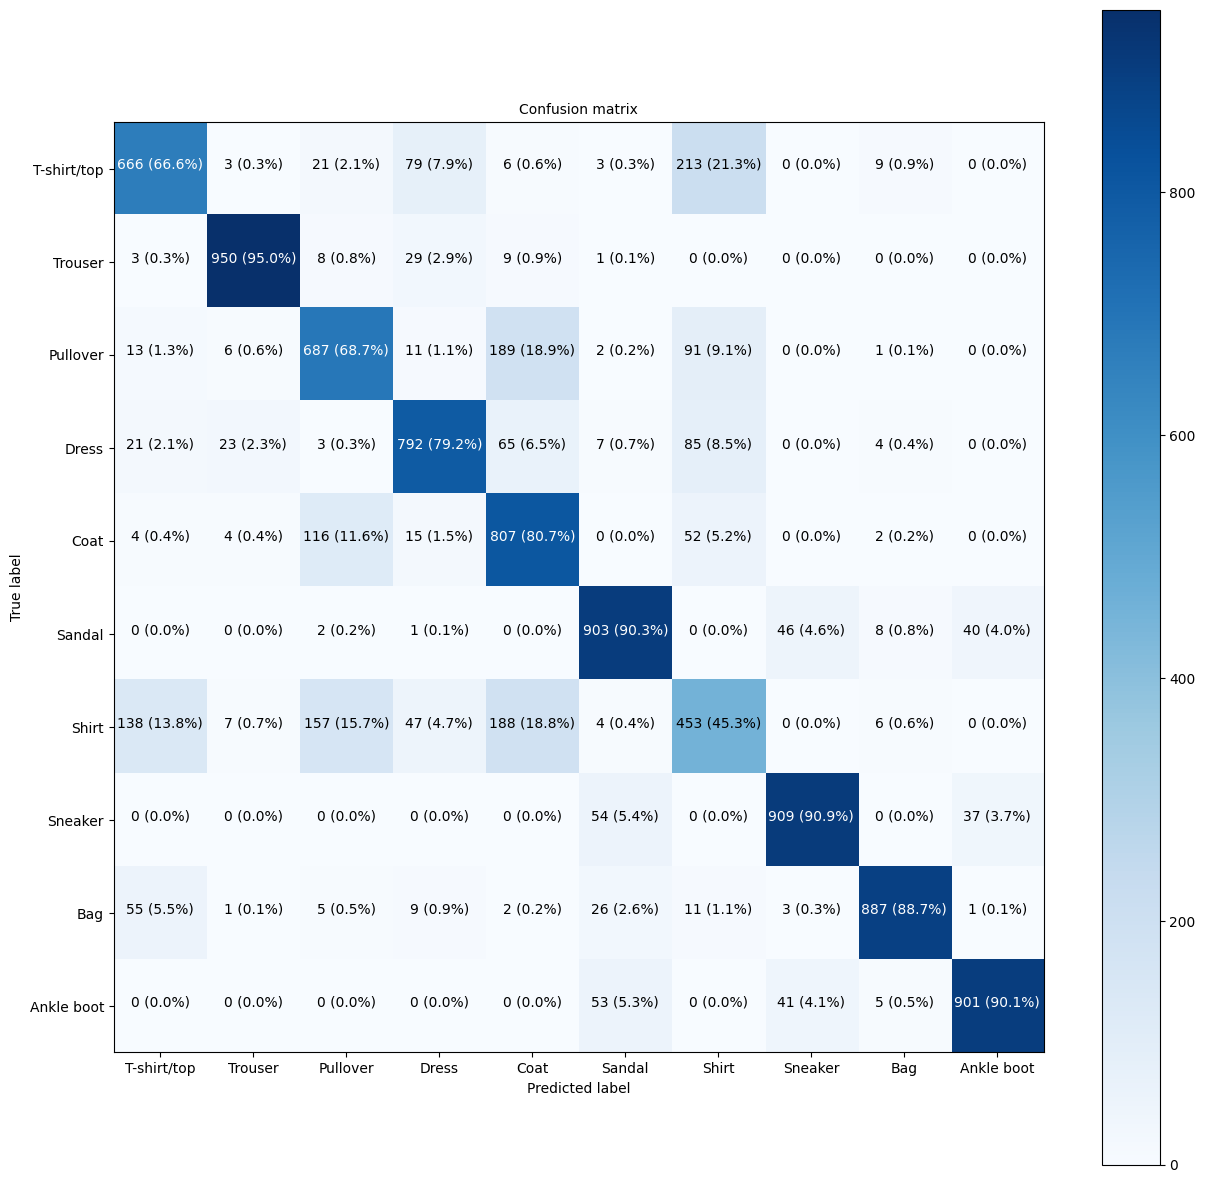

In [161]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_preds = y_preds,
                      classes = class_names,
                      figsize=(15,15),
                      text_size = 10)

>🤔 How about we create a function for:
- Plot a random image
- Make a prediction on said image
- Label the plot with the truth label and the predicted label

In [162]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
        Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap = plt.cm.binary)

    # Change the color of the titles depending on the predictions (Right or wrong)
    if pred_label == true_label:
        color = "Green"
    else:
        color = 'Red'

    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,100*tf.reduce_max(pred_probs),
                                                     true_label),
               color = color)

1/1 [==============================] - 0s 42ms/step


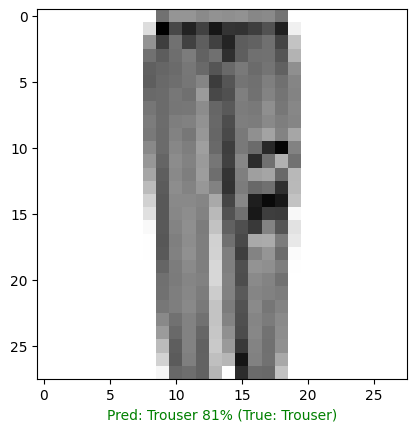

In [177]:
# Let's check it out
plot_random_image(model = model_13,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

#### What patterns is our model learning?

In [178]:
# Find the layers of our most recent model
model_13.layers

In [180]:
# Extract a particular layer
model_13.layers[1]

In [181]:
# Get the patterns of a layer in our network
weights, biases = model_13.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.07183903, -0.37088808, -0.34866032,  0.61143744],
        [-0.51951027,  0.2163946 , -0.14662804, -0.40120542],
        [ 0.95008177, -1.3854054 , -0.6092988 ,  0.15315095],
        ...,
        [ 0.626896  , -0.23978099, -0.97082925, -0.20344564],
        [-0.00684993,  0.02393433, -1.3680011 ,  0.1449512 ],
        [ 0.02139798, -0.04518613, -0.20729007, -0.25542068]],
       dtype=float32),
 (784, 4))

In [182]:
28*28

784

In [183]:
model_13.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_67 (Dense)            (None, 4)                 3140      
                                                                 
 dense_68 (Dense)            (None, 4)                 20        
                                                                 
 dense_69 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now Let's check out the bias vector...

In [184]:
biases, biases.shape

(array([ 0.176662  ,  0.0538893 ,  1.0599383 , -0.11619401], dtype=float32),
 (4,))

```tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)```


---


Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vectors are initialized as zeros (atleast in the case of tensorflow dense layer)

The bias vector dictates how much the pattern within the corresponding weight matrix should influence the next layer.

In [185]:
model_13.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_67 (Dense)            (None, 4)                 3140      
                                                                 
 dense_68 (Dense)            (None, 4)                 20        
                                                                 
 dense_69 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
